In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
import json
# Import API key
import gmaps
# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
trip_data=pd.read_csv("transport_data.csv")
trip_data.head()

,TRVLCMIN,TRPMILES,TRPTRANS,TDWKND(1yes/2No),WHYTRPHomeS,HHSTATE,URBRUR,R_AGE,EDUC,R_SEX,Population
0,30,1.000,walk,2,Home,PA,URBAN,82,Graduate degree or professional degree,Male,"4,000-9,999"
1,30,1.000,walk,2,Home,PA,URBAN,78,Some college or associates degree,Female,"4,000-9,999"
2,15,0.688,walk,2,social/Recreational,CA,URBAN,40,Less than a high school graduate,Female,100-499
3,15,0.688,walk,2,Home,CA,URBAN,40,Less than a high school graduate,Female,100-499
4,5,0.239,walk,2,work,NY,URBAN,38,Bachelor's degree,Male,"10,000-24,999"


In [3]:
walk_time=(trip_data.loc[(trip_data["TRPTRANS"]=="walk"),"TRVLCMIN"]).mean()
Bike_time=trip_data.loc[(trip_data["TRPTRANS"]=="bike","TRVLCMIN")].mean()
segway_time=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway","TRVLCMIN")].mean()
#scooter_time=trip_data.loc[(trip_data["TRPTRANS"]=="Scooters,Skateborad etc","TRVLCMIN")].mean()
transport=["Walk","Bike","Segway/Scooters"]
mean_time=[walk_time,Bike_time,segway_time]

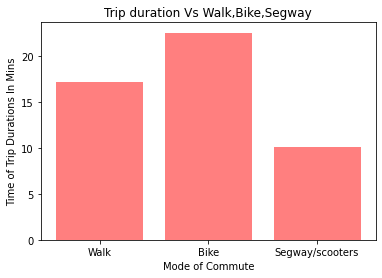

In [84]:
plt.bar(transport, mean_time, color='r', alpha=0.5, align="center")
tick_locations = [value for value in transport]
plt.xticks(tick_locations, ["Walk", "Bike", "Segway/scooters"])
plt.title("Trip duration Vs Walk,Bike,Segway")
plt.xlabel("Mode of Commute")
plt.ylabel("Time of Trip Durations In Mins")
plt.savefig("TripDurations.png")

In [5]:
walk_dist=(trip_data.loc[(trip_data["TRPTRANS"]=="walk"),"TRPMILES"]).mean()
Bike_dist=trip_data.loc[(trip_data["TRPTRANS"]=="bike","TRPMILES")].mean()
segway_dist=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway","TRPMILES")].mean()
#scooter_time=trip_data.loc[(trip_data["TRPTRANS"]=="Scooters,Skateborad etc","TRPMILES")].mean()
transport=["Walk","Bike","Segway/Scooters"]
mean_dist=[walk_dist,Bike_dist,segway_dist]

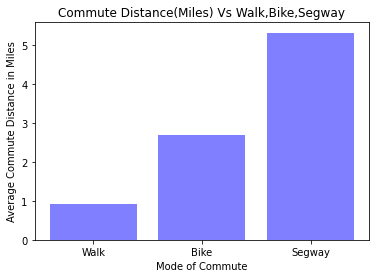

In [85]:
plt.bar(transport, mean_dist, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in transport]
plt.xticks(tick_locations, ["Walk", "Bike", "Segway", "Scooters etc"])
plt.title("Commute Distance(Miles) Vs Walk,Bike,Segway")
plt.xlabel("Mode of Commute")
plt.ylabel("Average Commute Distance in Miles")
plt.savefig("Commutedistance.png")

In [86]:
#how many male vs Female using bike/Mcromobilty )
#female_walk=(trip_data.loc[(trip_data["TRPTRANS"]=="walk")&(trip_data["R_SEX"]=="Female"),"R_SEX"]).count()
#male_walk=(trip_data.loc[(trip_data["TRPTRANS"]=="walk")&(trip_data["R_SEX"]=="Male"),"R_SEX"]).count()

female=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&(trip_data["R_SEX"]=="Female"),"R_SEX"].count()
male=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&(trip_data["R_SEX"]=="Male"),"R_SEX"].count()


female_segway=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&(trip_data["R_SEX"]=="Female"),"R_SEX"].count()
male_segway=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&(trip_data["R_SEX"]=="Male"),"R_SEX"].count()

tot_female_users=female+female_segway
tot_male_users=male+male_segway

tot_users=tot_male_users+tot_female_users

female_percent=(tot_female_users/tot_users)*100

male_percent=(tot_male_users/tot_users)*100
print(tot_male_users,tot_female_users,tot_users,female_percent,male_percent)


5908 2906 8814 32.97027456319492 67.0297254368051


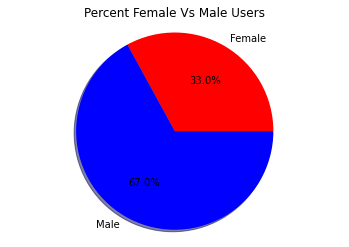

In [87]:
gender=["Female","Male"]
count=[female_percent,male_percent]
colors = ["red","blue"]
plt.pie(count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Percent Female Vs Male Users")
# Save an image of our chart and print the final product to the screen
plt.savefig("genderusers.png")
plt.show()

In [38]:

#walk_time=(trip_data.loc[(trip_data["TRPTRANS"]=="walk"),"URBRUR"]).mean()

Bike_urban=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&(trip_data["URBRUR"]=="URBAN"),"URBRUR"].count()
Bike_rural=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&(trip_data["URBRUR"]=="Rural"),"URBRUR"].count()

segway_urban=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&(trip_data["URBRUR"]=="URBAN"),"URBRUR"].count()
segway_rural=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&(trip_data["URBRUR"]=="Rural"),"URBRUR"].count()

total_urban=Bike_urban+segway_urban
total_rural=Bike_rural+segway_rural
tot=total_urban+total_rural
per_urban=(total_urban/tot)*100
per_rural=(total_rural/tot)*100
print(per_urban,per_rural)

89.01805869074492 10.98194130925508


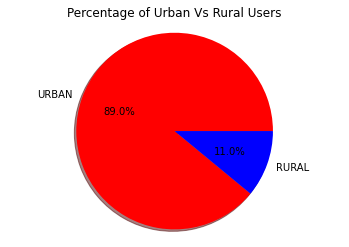

In [88]:
urban_rural=["URBAN","RURAL"]
count=[per_urban,per_rural]
colors = ["red","blue"]
plt.pie(count, labels=urban_rural, colors=colors,
        autopct="%1.1f%%", shadow=True)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Percentage of Urban Vs Rural Users")
# Save an image of our chart and print the final product to the screen
plt.savefig("urbanVsRural.png")
plt.show()

In [91]:
#mean age group plot
bet_sixteen_twentyfive=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&((trip_data["R_AGE"]>=16)&(trip_data["R_AGE"]<=25)),"R_AGE"].count()

bet_twentysix_fifty=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&((trip_data["R_AGE"]>25)&(trip_data["R_AGE"]<=50)),"R_AGE"].count()

bet_fifty_sixtyfive=trip_data.loc[(trip_data["TRPTRANS"]=="bike")&(trip_data["R_AGE"]>50)&(trip_data["R_AGE"]<=65),"R_AGE"].count()

print(bet_sixteen_twentyfive,bet_twentysix_fifty,bet_fifty_sixtyfive)

bet_sixteen_twentyfive_segway=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&((trip_data["R_AGE"]>=16)&(trip_data["R_AGE"]<=25)),"R_AGE"].count()
bet_twentysix_fifty_segway=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&((trip_data["R_AGE"]>25)&(trip_data["R_AGE"]<=50)),"R_AGE"].count()
bet_fifty_sixtyfive_segway=trip_data.loc[(trip_data["TRPTRANS"]=="Golf Cart/Segway")&(trip_data["R_AGE"]<=65),"R_AGE"].count()

eighteen_total=(bet_sixteen_twentyfive+bet_sixteen_twentyfive_segway)
                
bet_ninteen_fortyfive_total=bet_twentysix_fifty+bet_twentysix_fifty_segway

beyondfortyfive_total=bet_fifty_sixtyfive+bet_fifty_sixtyfive_segway
tot=eighteen_total+bet_ninteen_fortyfive_total+beyondfortyfive_total

per_eighteen_total=(eighteen_total/tot)*100
per_bet_ninteen_fortyfive_total=(bet_ninteen_fortyfive_total/tot)*100
per_beyondfortyfive_total=(beyondfortyfive_total/tot)*100              
age_groups=["16<AgeGroup<=25","25<AgeGroup<=50","50<AgeGroup<65"]
x_axis=[per_eighteen_total,per_bet_ninteen_fortyfive_total,per_beyondfortyfive_total]


704 2861 2023


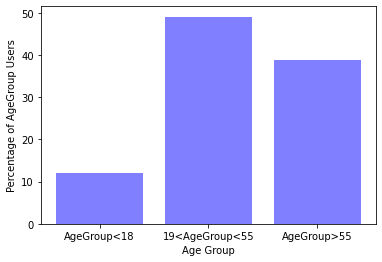

In [93]:
plt.bar(age_groups, x_axis, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in age_groups]
plt.xticks(tick_locations, ["AgeGroup<18","19<AgeGroup<55","AgeGroup>55"])
plt.xlabel("Age Group")
plt.ylabel("Percentage of AgeGroup Users")
plt.savefig("AgeGroup.png")